# Read checkerboard model and plot velocity and azimuthal anisotropy in horizontal section

In [1]:
from pytomoatt.model import ATTModel
import numpy as np
# initial model hdf5 file
init_model_file = '../0_generate_files_for_TomoATT/2_models/model_init_N61_61_61.h5'
# checkerboard model hdf5 file
inv_model_file = 'OUTPUT_FILES/OUTPUT_FILES_inv_abs/final_model.h5'
# input parameters file
par_file = 'input_params/input_params_inv_abs.yaml'

# read model file by pytomoatt
model = ATTModel.read(init_model_file, par_file)
init_model = model.to_xarray()

model = ATTModel.read(inv_model_file, par_file)
inv_model = model.to_xarray()


# we can access the velocity at arbitrary depth
all_depth = [10.0,30.0]
all_vel     = []
all_xi      = []
all_eta     = []
all_epsilon = []
all_ani     = []
for i in range(len(all_depth)):
    depth = all_depth[i]
    tmp = init_model.interp_dep(depth, field='vel')
    print("The shape of initial model array is ", tmp.shape)
    lon = tmp[:,0]
    lat = tmp[:,1]
    vel_init = tmp[:,2]
    vel_ckb  = inv_model.interp_dep(depth, field='vel')[:,2]
    all_vel.append((vel_ckb - vel_init)/vel_init * 100.0)

    # similarly, anisotropic parameters xi and eta
    all_xi.append(inv_model.interp_dep(depth, field='xi')[:,2])
    all_eta.append(inv_model.interp_dep(depth, field='eta')[:,2])
    all_epsilon.append(inv_model.interp_dep(depth, field='epsilon')[:,2])

    # magnitude and direction of anisotropy
    tmp     = inv_model.interp_dep(depth, field='phi', samp_interval=5) # fast velocity direction, samp_interval is the sampling one point every 20 points in each axis
    ani_lon = tmp[:,0]
    ani_lat = tmp[:,1]
    ani_phi = tmp[:,2]
    ani_epsilon = inv_model.interp_dep(depth, field='epsilon', samp_interval=5)[:,2]
    ani = np.hstack([ani_lon[:,None], ani_lat[:,None], ani_phi[:,None], ani_epsilon[:,None]*20, np.ones((ani_phi.shape[0],1))*0.1])
    all_ani.append(ani)

The shape of initial model array is  (3721, 3)
The shape of initial model array is  (3721, 3)


# Pygmt plot velocity perturbation related to initial model, xi, eta, fast velocity directions

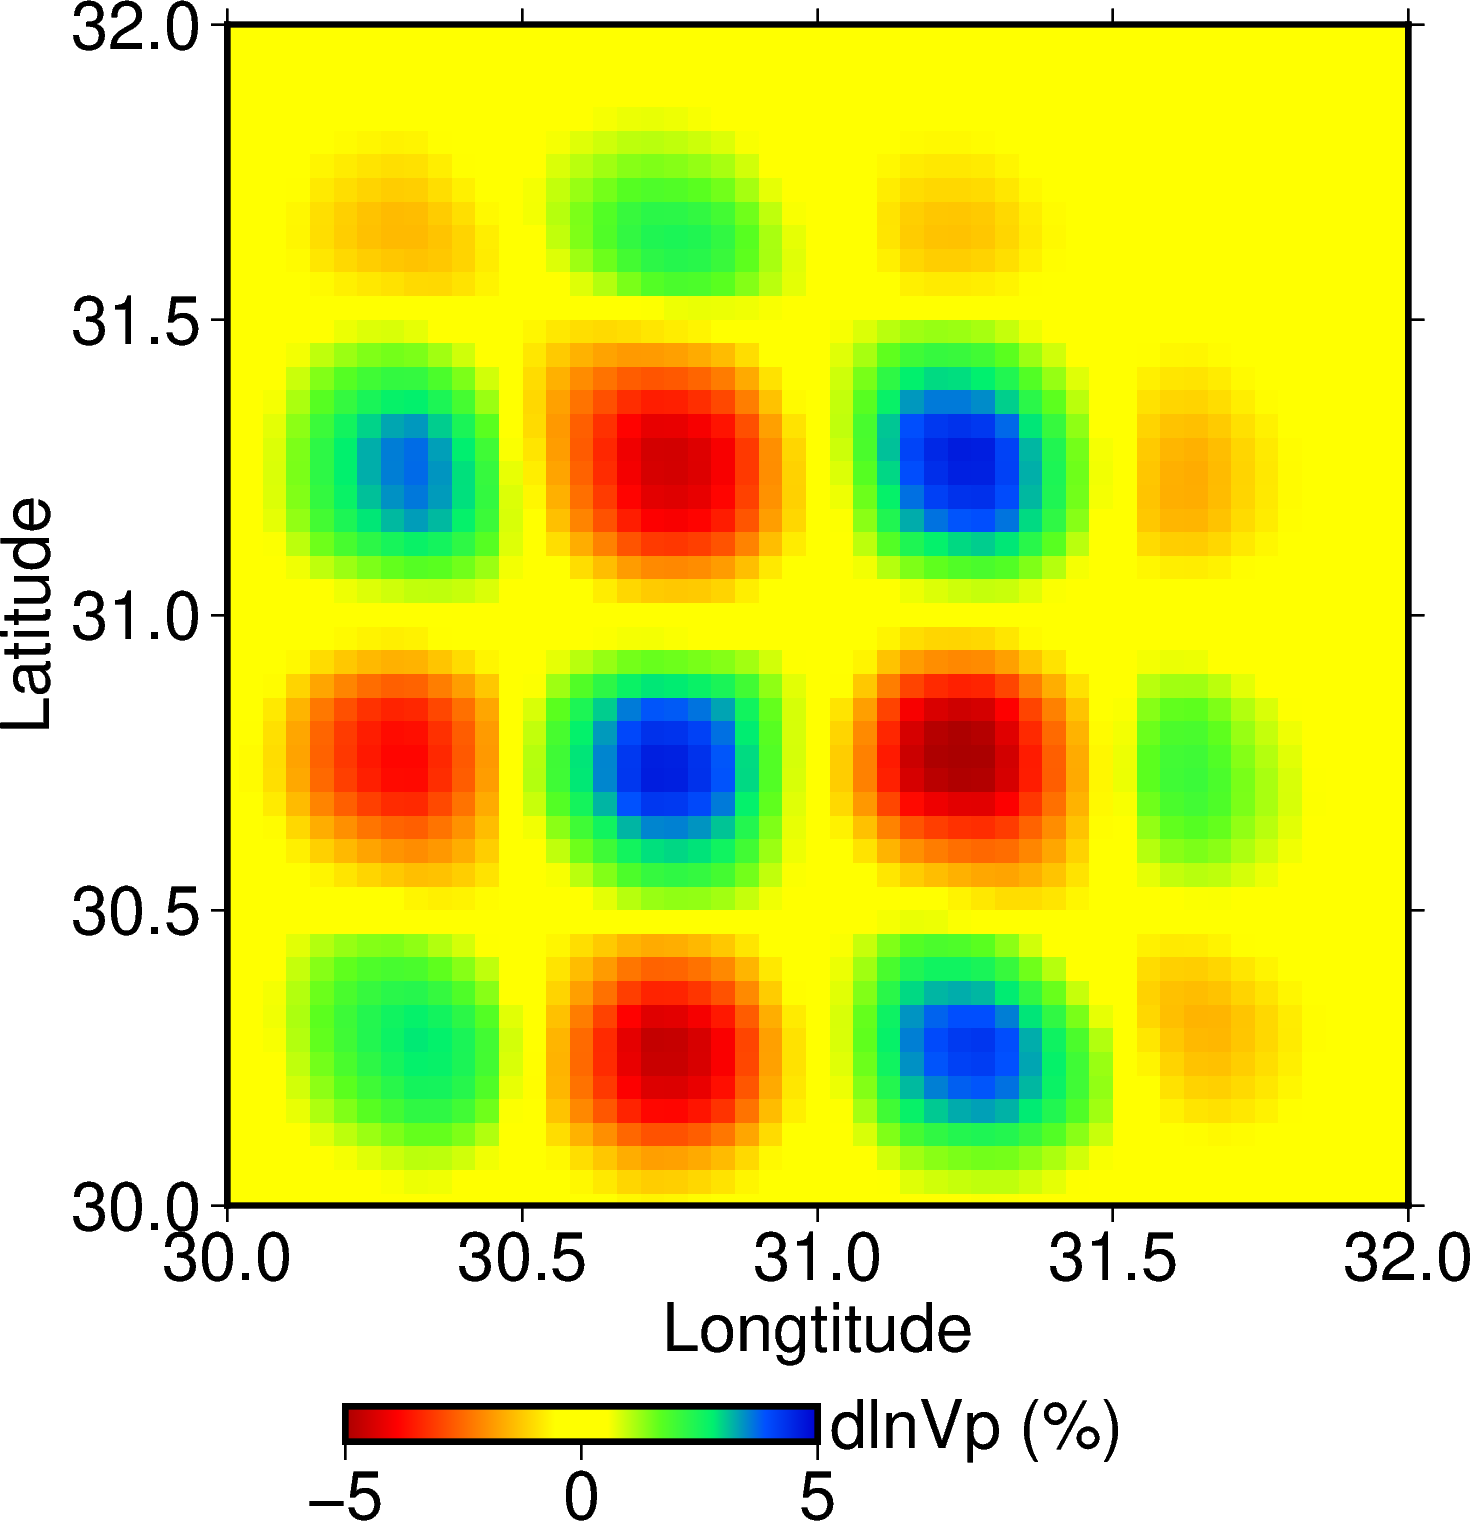

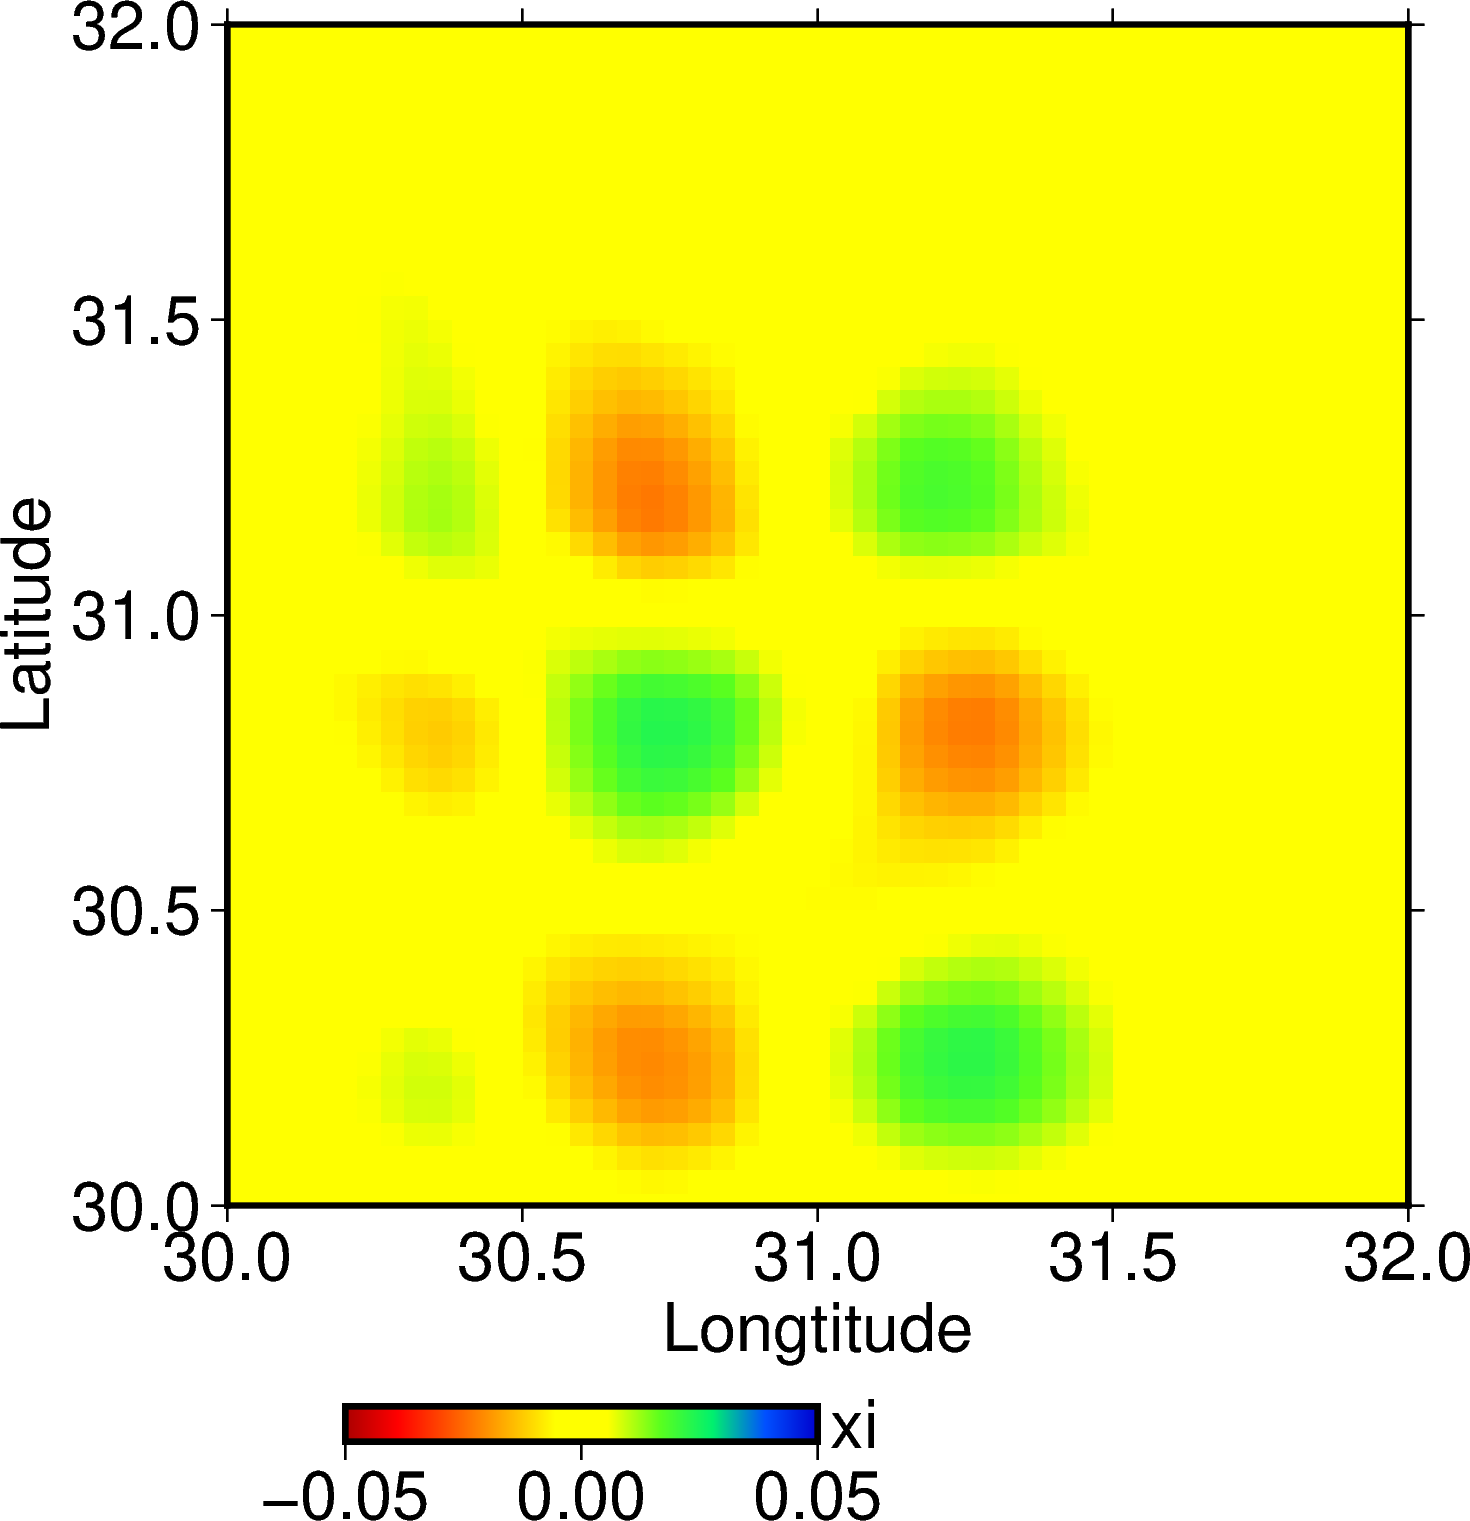

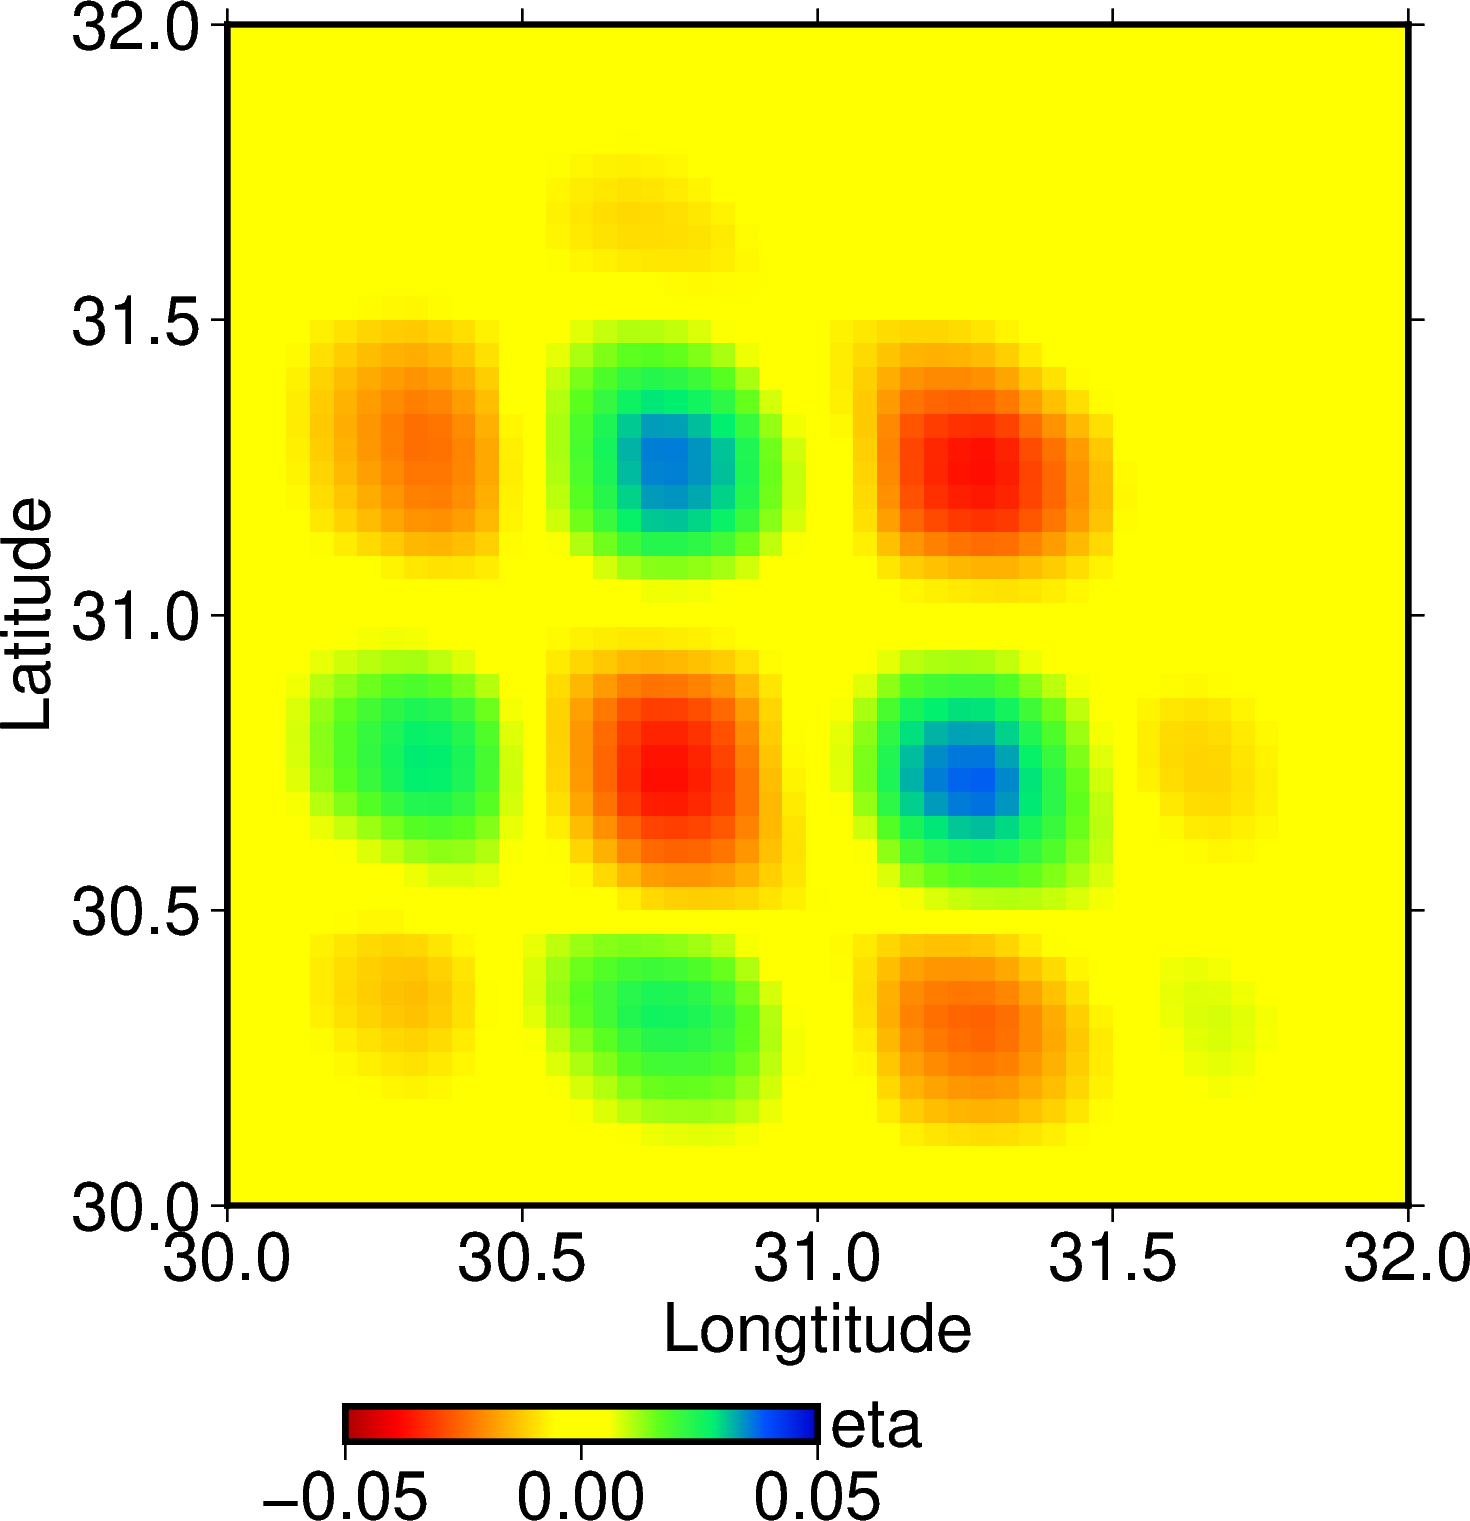

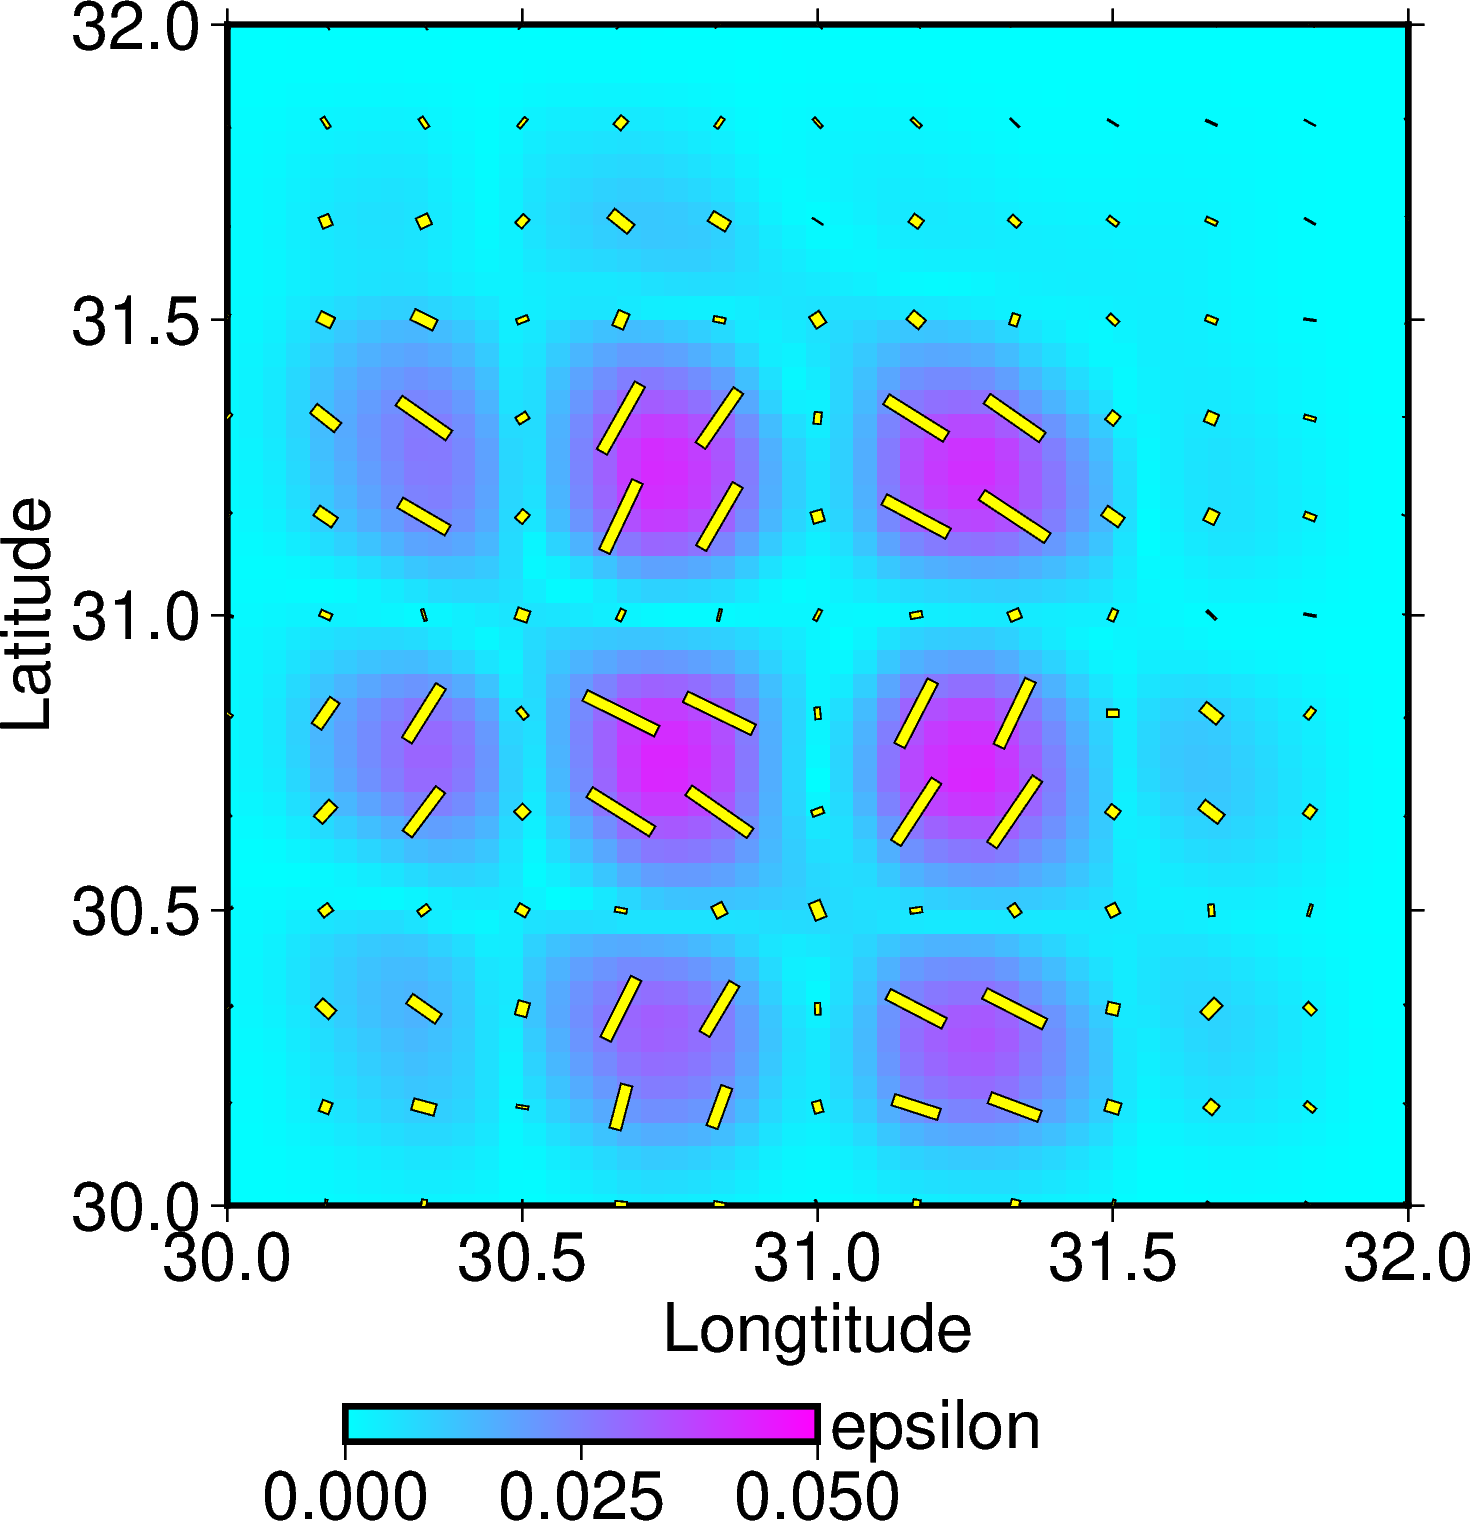

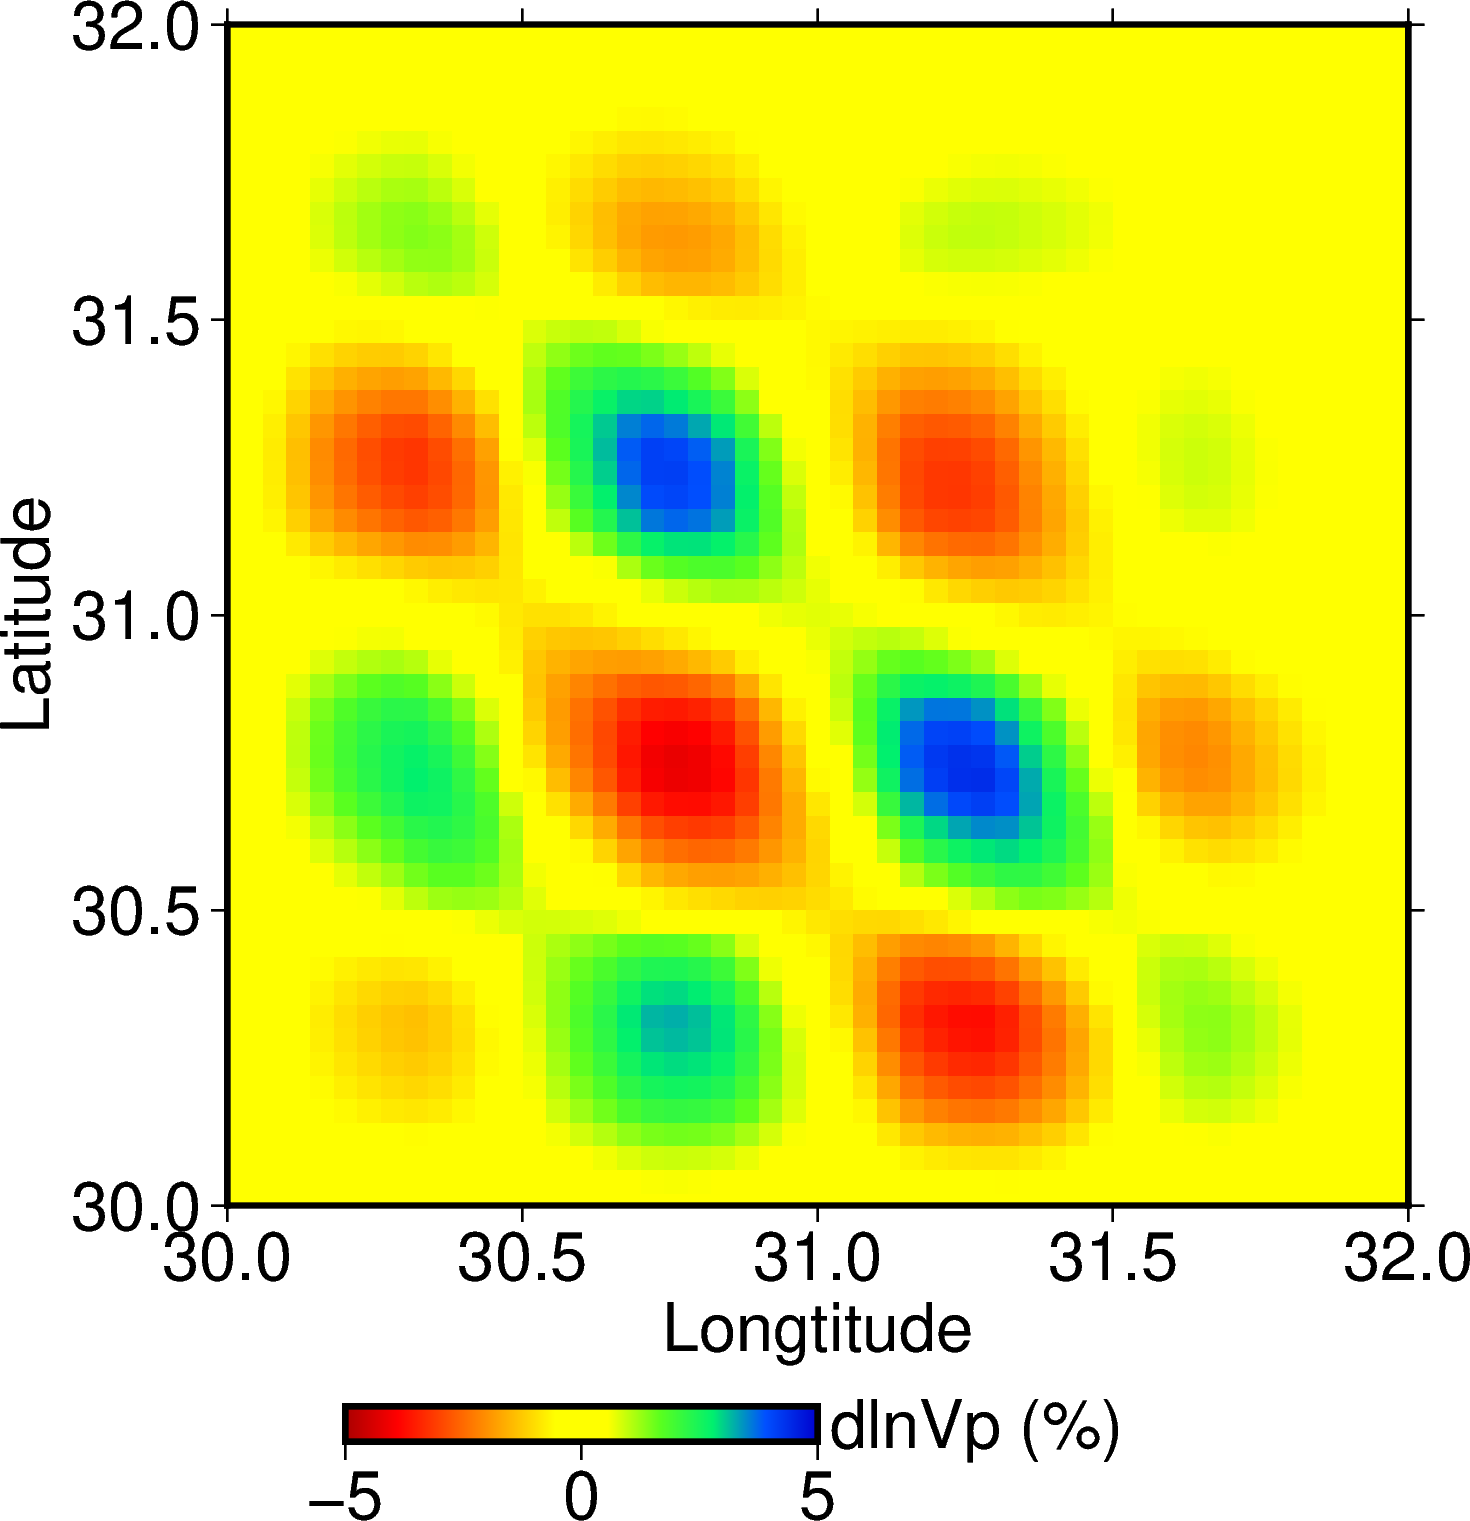

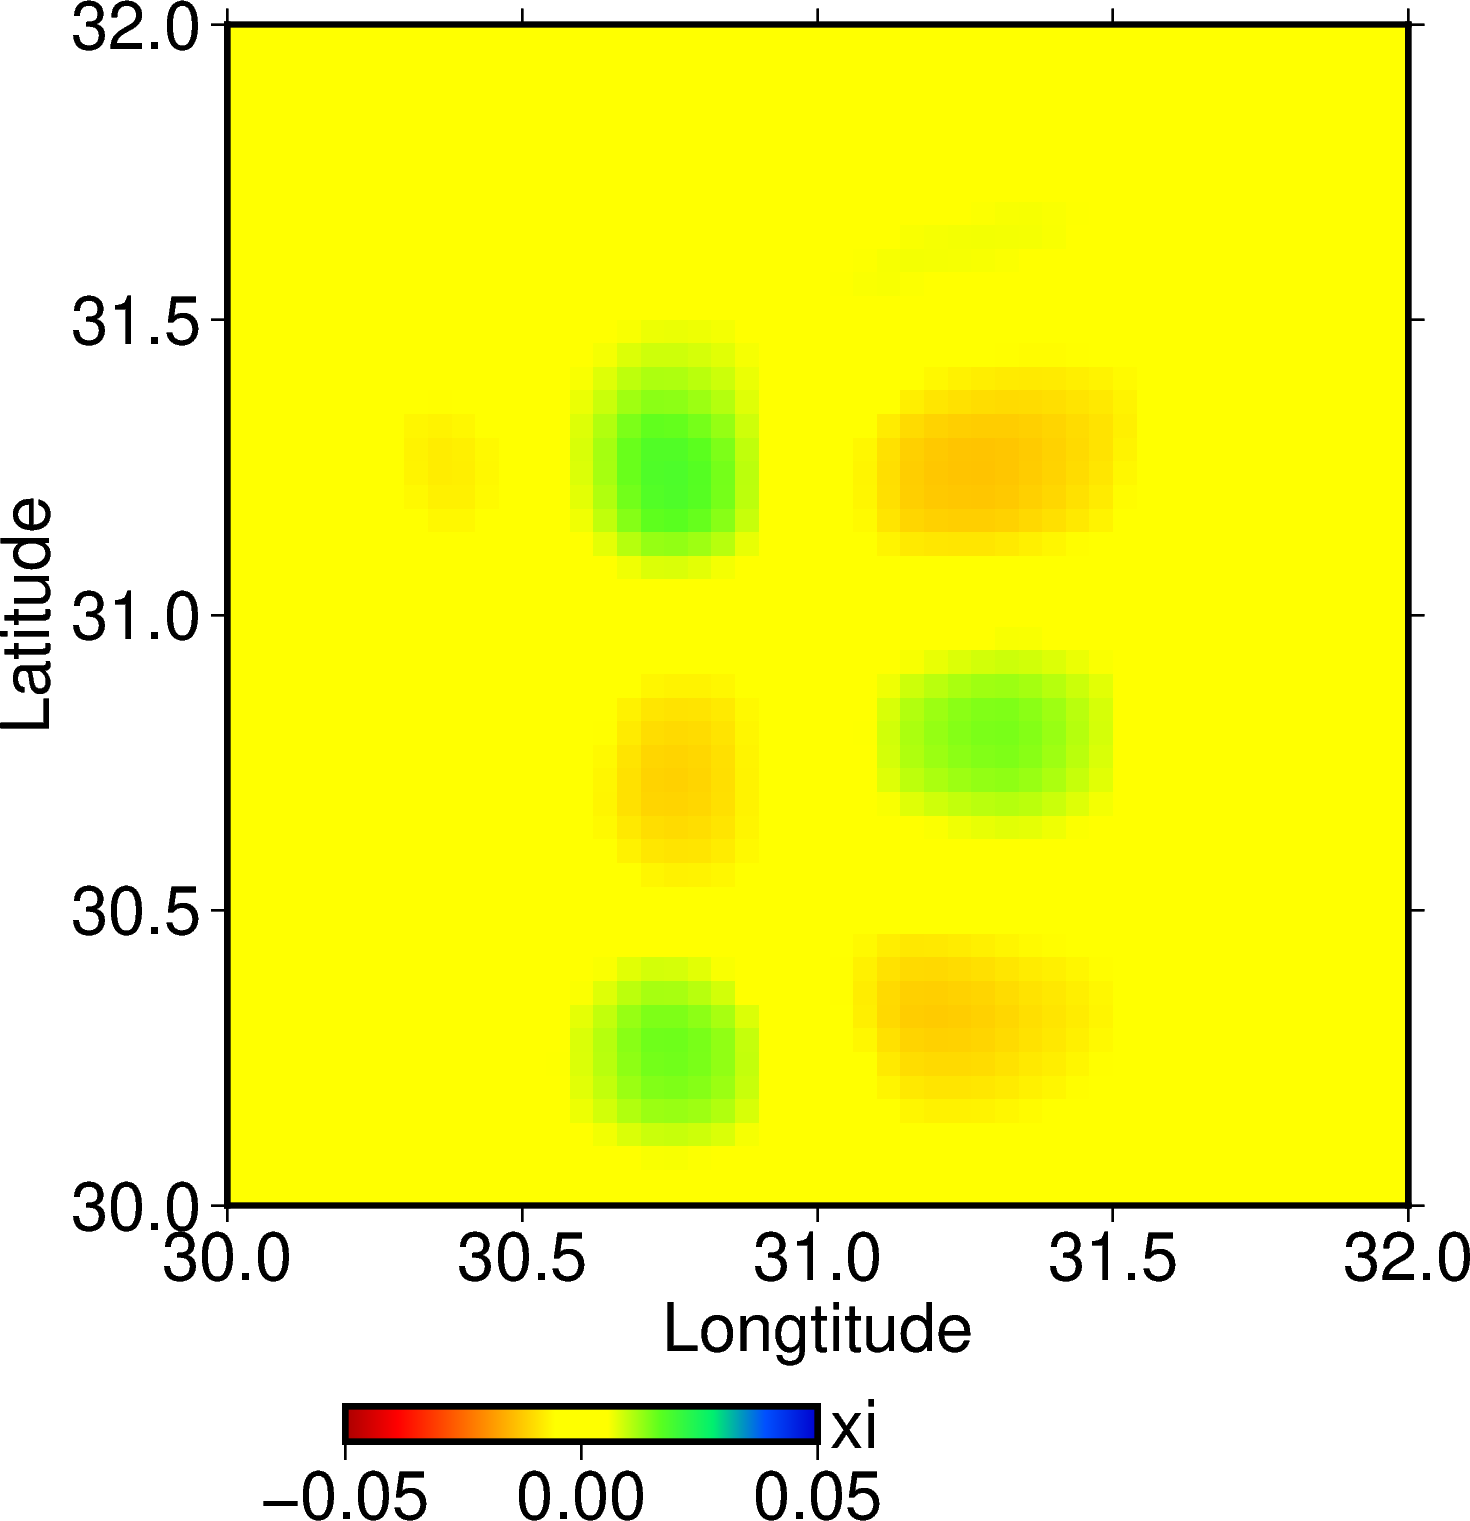

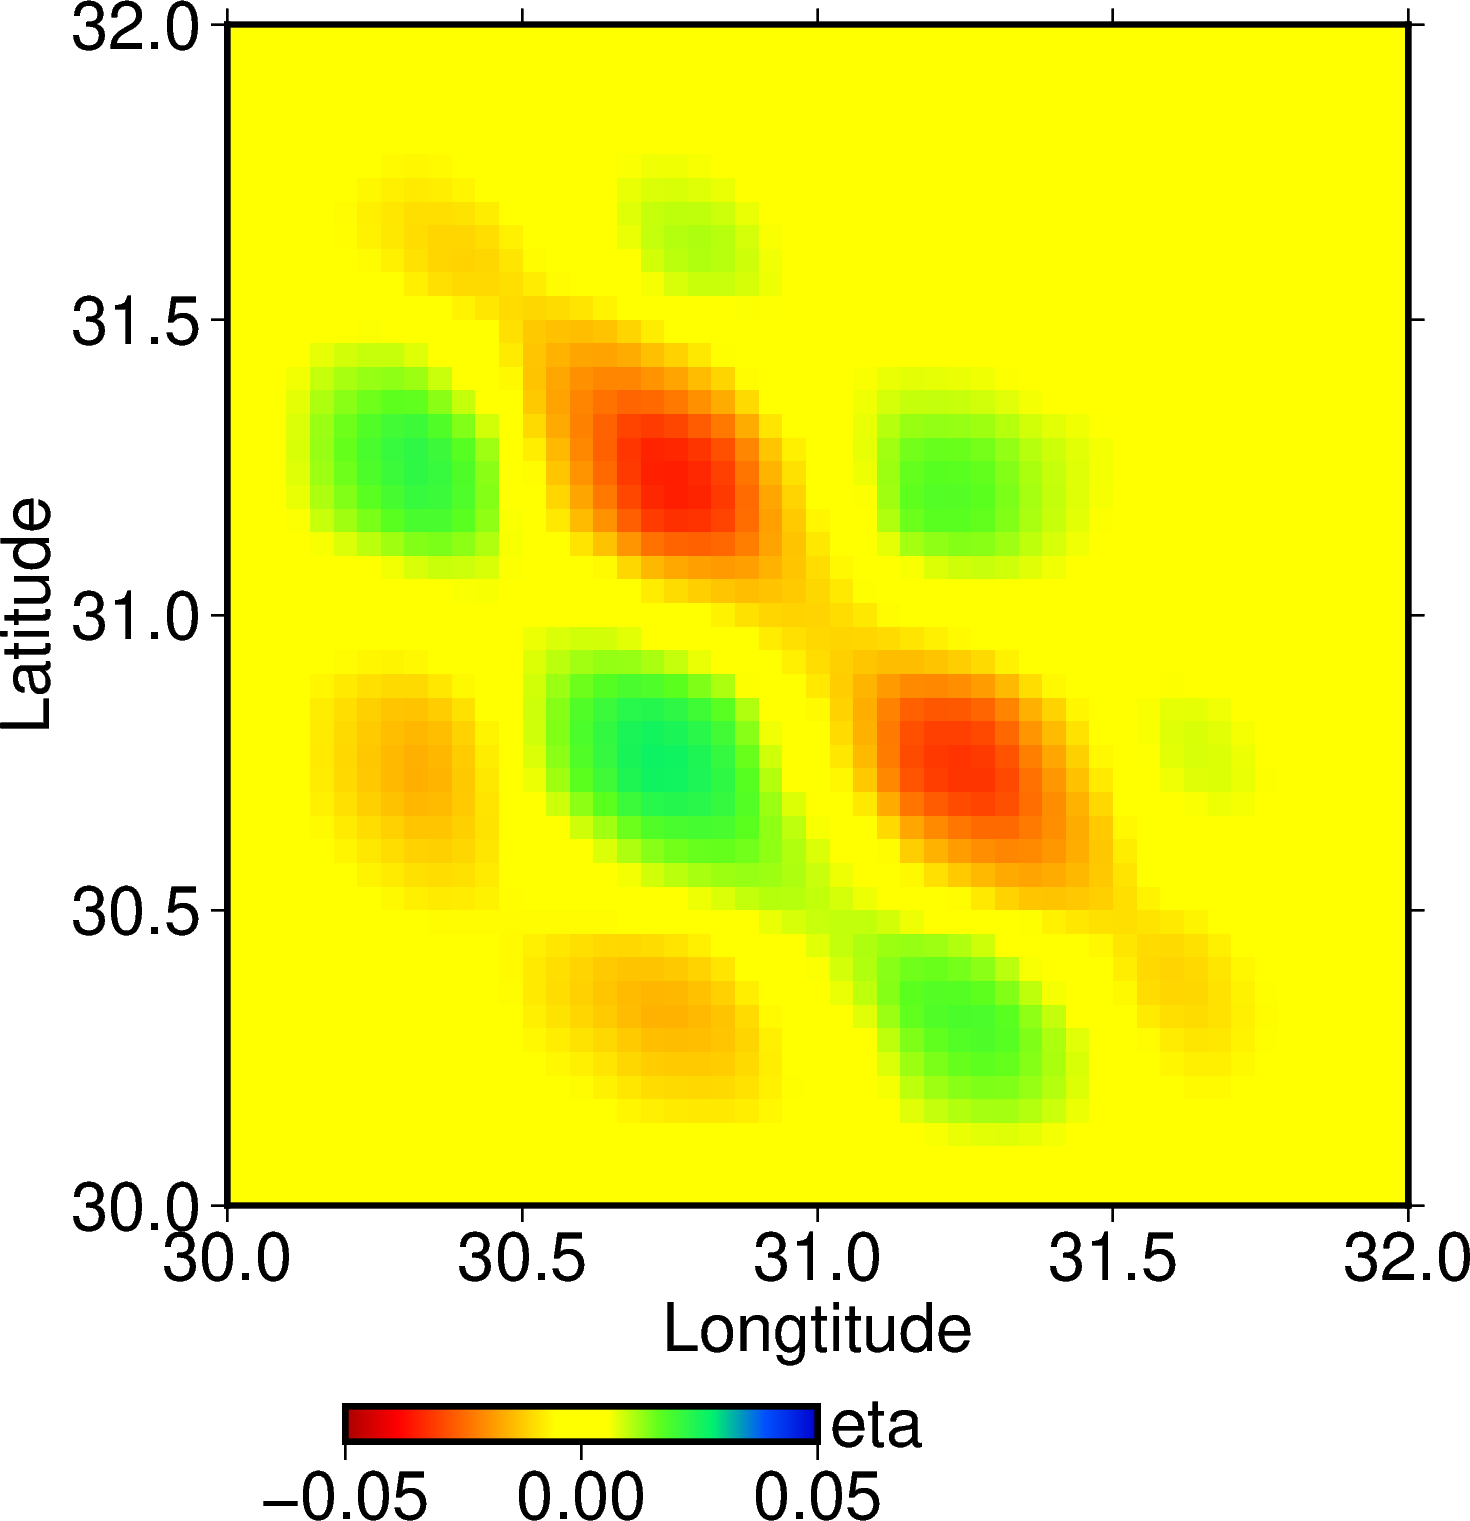

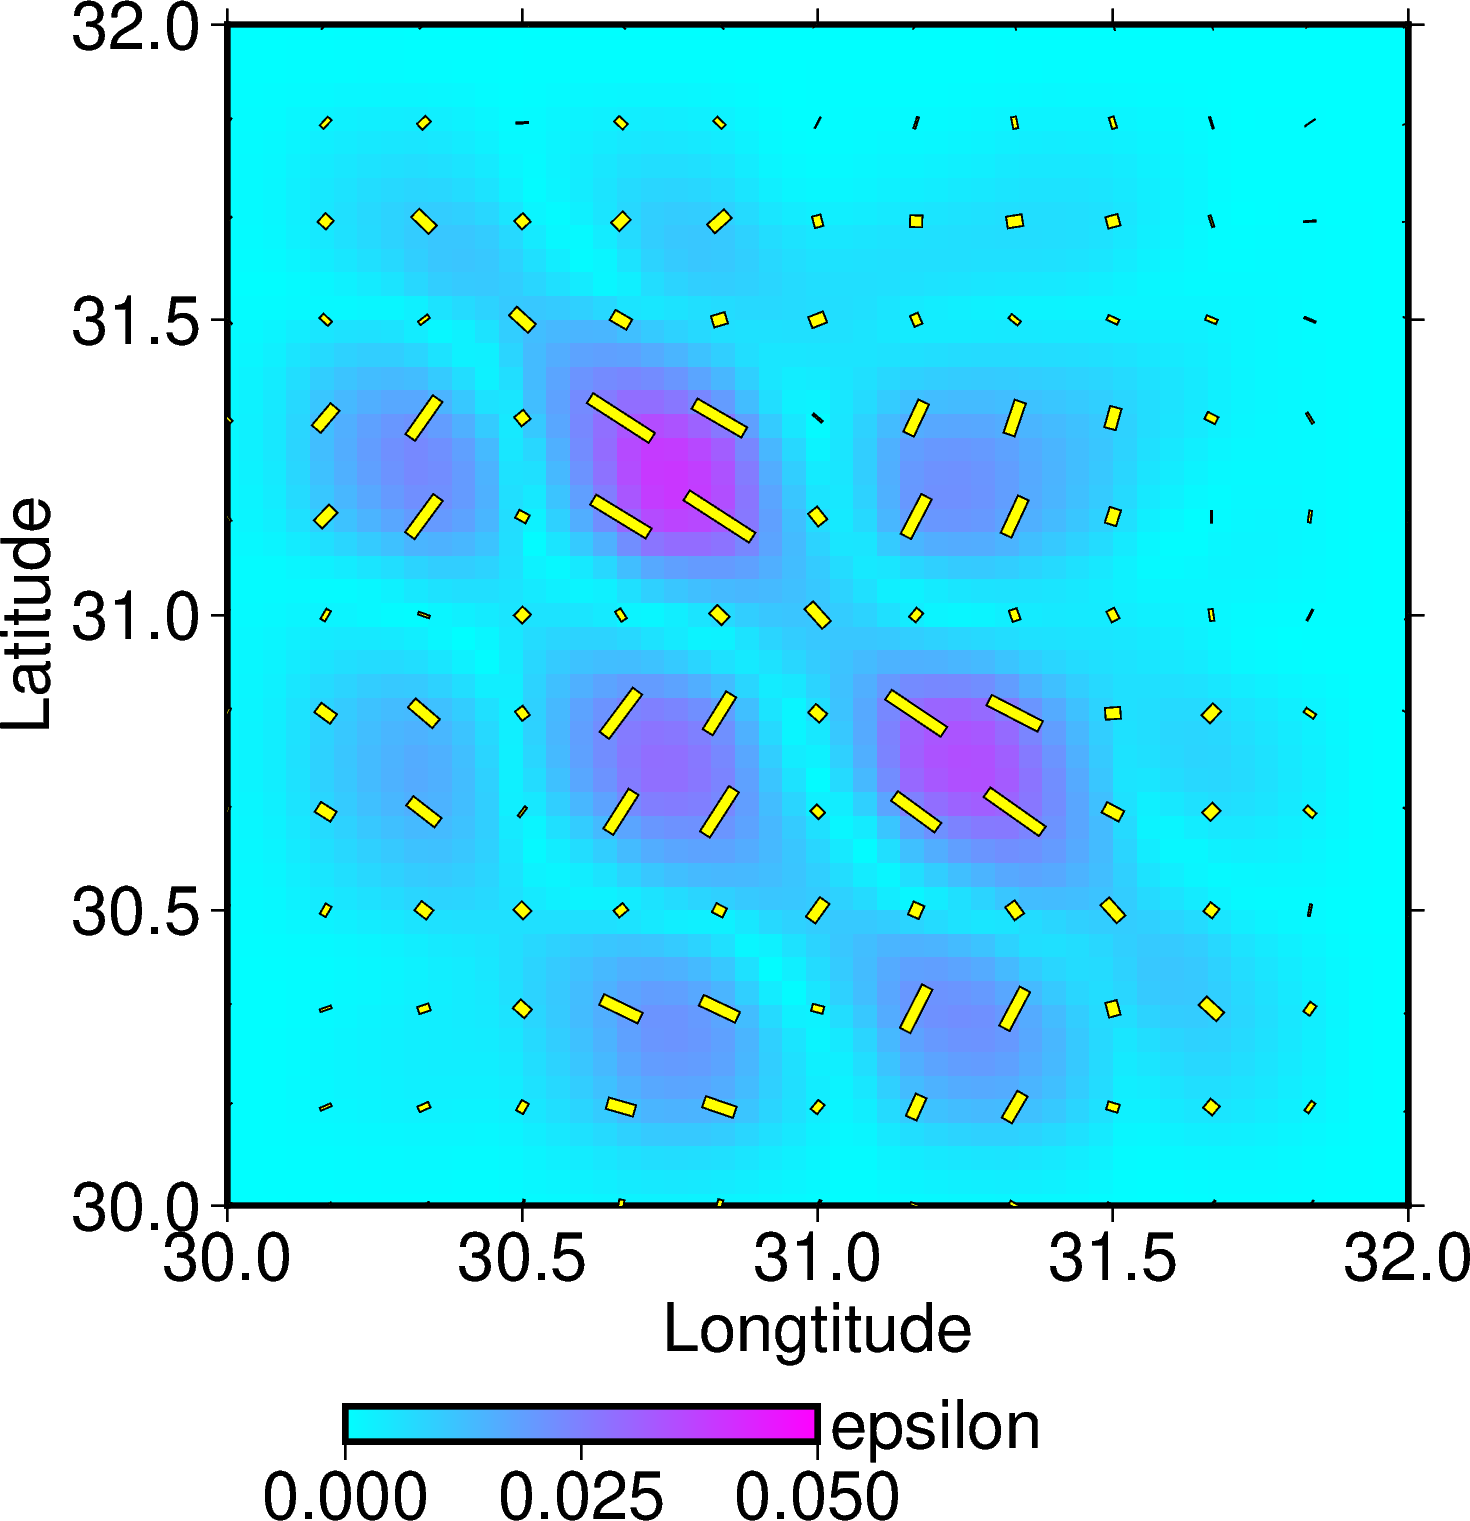

In [2]:
import sys
sys.path.append('../utils')
from functions_for_plot import plot_map

dx = 0.04; dy = 0.04
for i in range(len(all_depth)):
    vel = all_vel[i]
    xi  = all_xi[i]
    eta = all_eta[i]
    epsilon = all_epsilon[i]
    ani = all_ani[i]

    fname = 'img/3a_inv_model_depth_'+str(all_depth[i])+'.png'
    fig = plot_map(lon,lat,vel,dx,dy,
                fname       = fname, 
                axis_label  = ["Longtitude","Latitude"],
                colorbar    = "dlnVp (%)", 
                cpt_range   = [-5,5])

    fname = 'img/3b_inv_xi_depth_'+str(all_depth[i])+'.png'
    fig = plot_map(lon,lat,xi,dx,dy,
                fname = fname, 
                axis_label  = ["Longtitude","Latitude"],
                colorbar = "xi",
                cpt_range = [-0.05,0.05],)

    fname = 'img/3c_inv_eta_depth_'+str(all_depth[i])+'.png'
    fig = plot_map(lon,lat,eta,dx,dy,
                fname = fname, 
                axis_label  = ["Longtitude","Latitude"],
                colorbar = "eta",
                cpt_range = [-0.05,0.05],)

    fname = 'img/3d_inv_ani_depth_'+str(all_depth[i])+'.png'
    fig = plot_map(lon,lat,epsilon,dx,dy,
                anisotropy = ani,
                fname = fname, 
                axis_label  = ["Longtitude","Latitude"],
                colorbar = "epsilon",
                cmap = "cool",
                cpt_range = [0,0.05],)

In [3]:
# we can also access the velocity at arbitrary vertical profile
all_start = [
    [30.0, 30.75],
    [30.75, 30.0],
]
all_end = [
    [32.0, 30.75],
    [30.75, 32.0],
]

sec_lon = []
sec_lat = []
sec_dis = []
sec_dep = []
sec_vel = []
for i in range(len(all_start)):
    start = all_start[i]
    end = all_end[i]
    tmp = init_model.interp_sec(start, end, field='vel', val = 1)
    print("The shape of initial model array is ", tmp.shape)
    sec_lon.append(tmp[:,0])
    sec_lat.append(tmp[:,1])
    sec_dis.append(tmp[:,2])
    sec_dep.append(tmp[:,3])

    vel_init = tmp[:,4]
    vel_ckb  = inv_model.interp_sec(start, end, field='vel', val = 1)[:,4]
    sec_vel.append((vel_ckb - vel_init)/vel_init * 100.0)

The shape of initial model array is  (11712, 5)
The shape of initial model array is  (13542, 5)


d:\my_software\python\lib\site-packages\pyproj\geod.py:827: UserWarning: Back azimuth is being returned by default to be compatible with inv()This is a breaking change for pyproj 3.5+.To avoid this warning, set return_back_azimuth=True.Otherwise, to restore old behaviour, set return_back_azimuth=False.This warning will be removed in future version.
  warnings.warn(


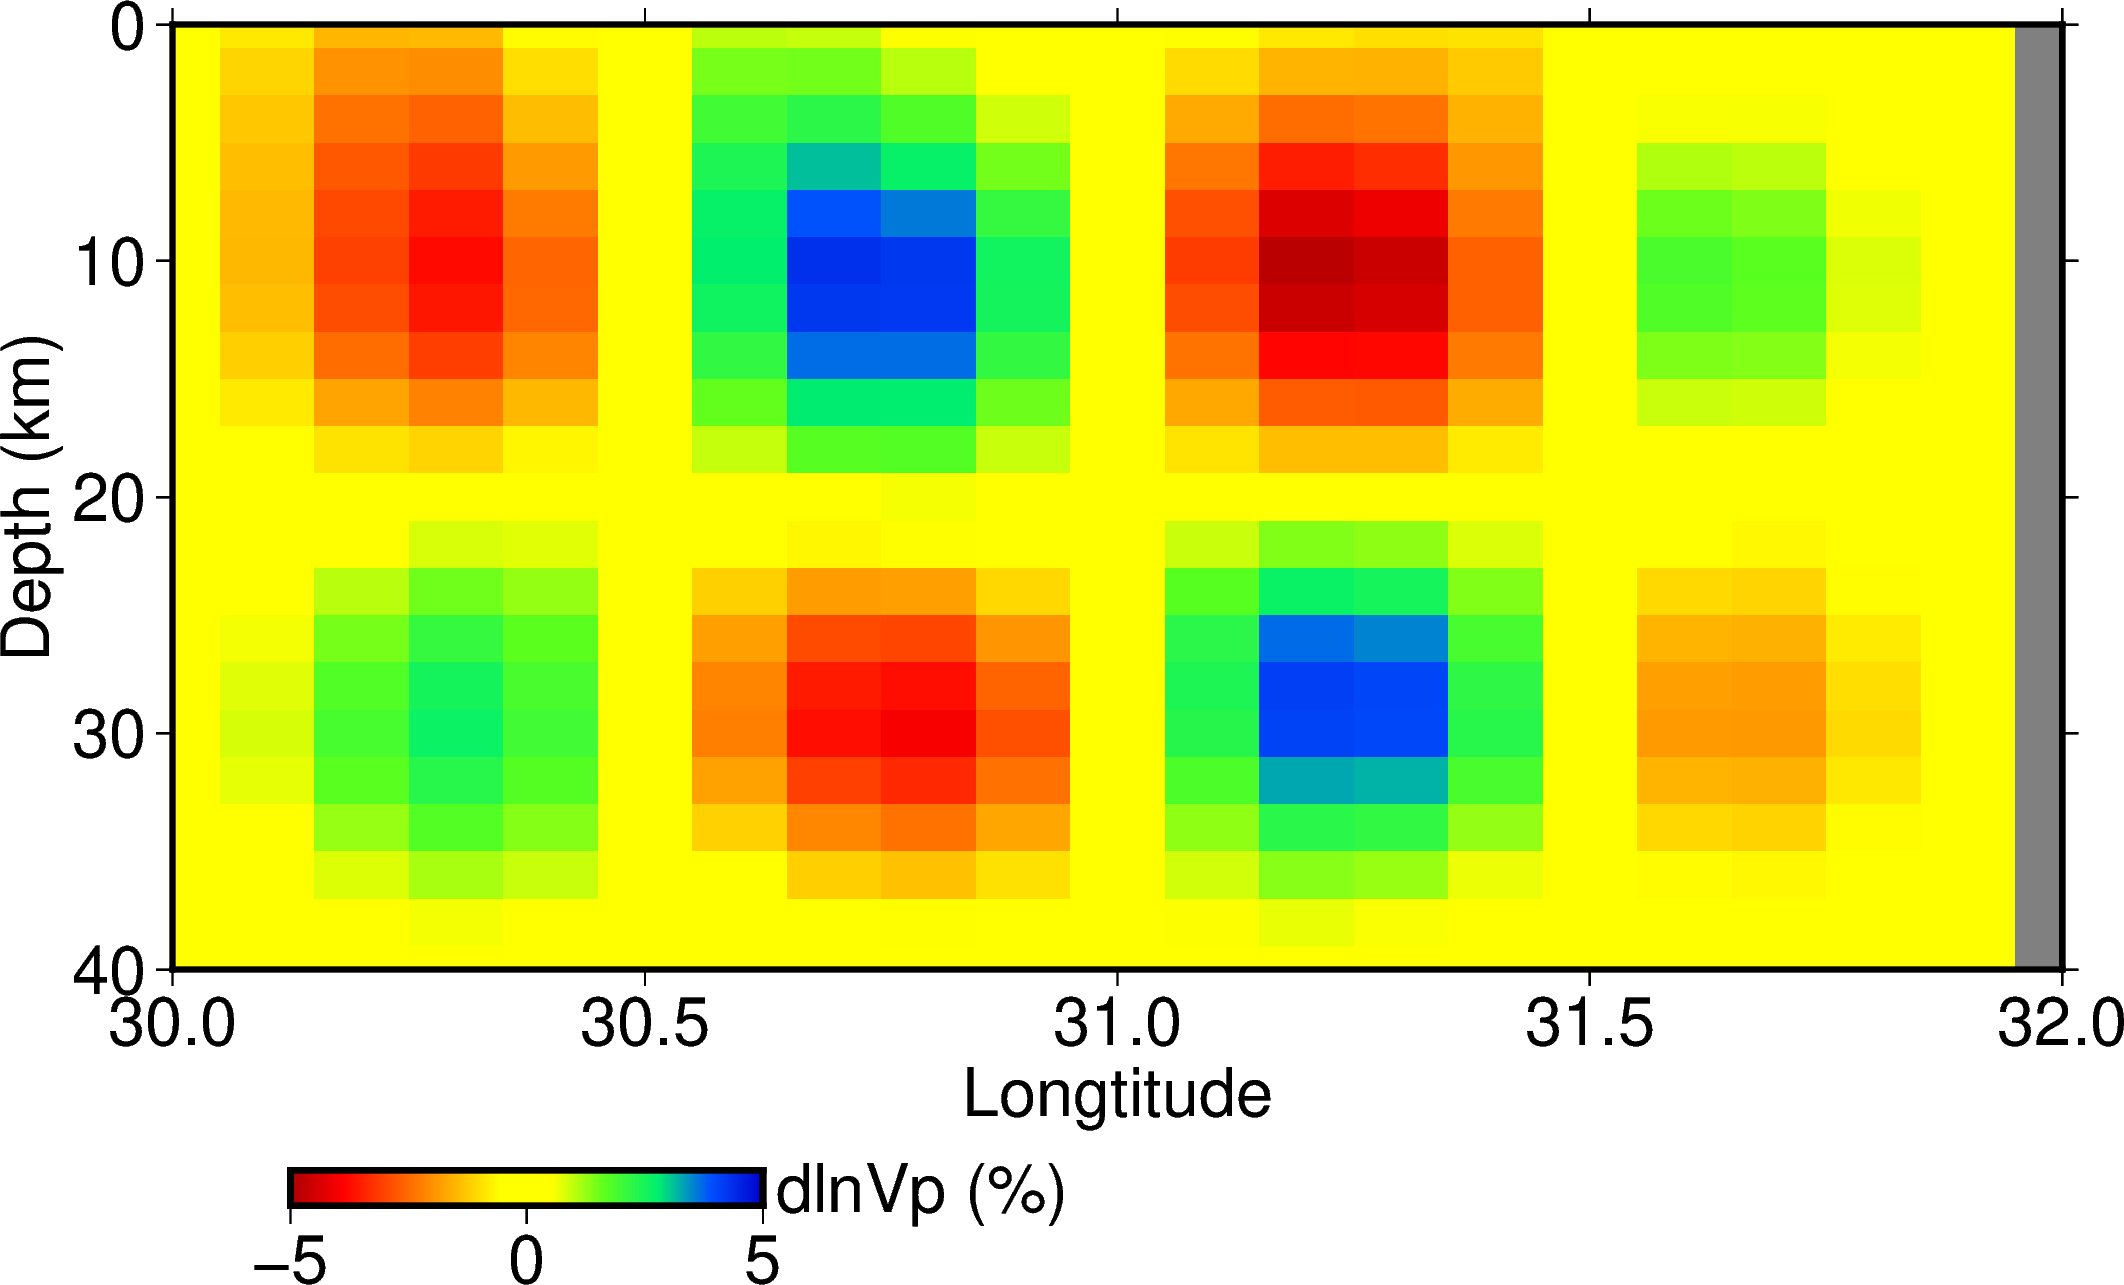

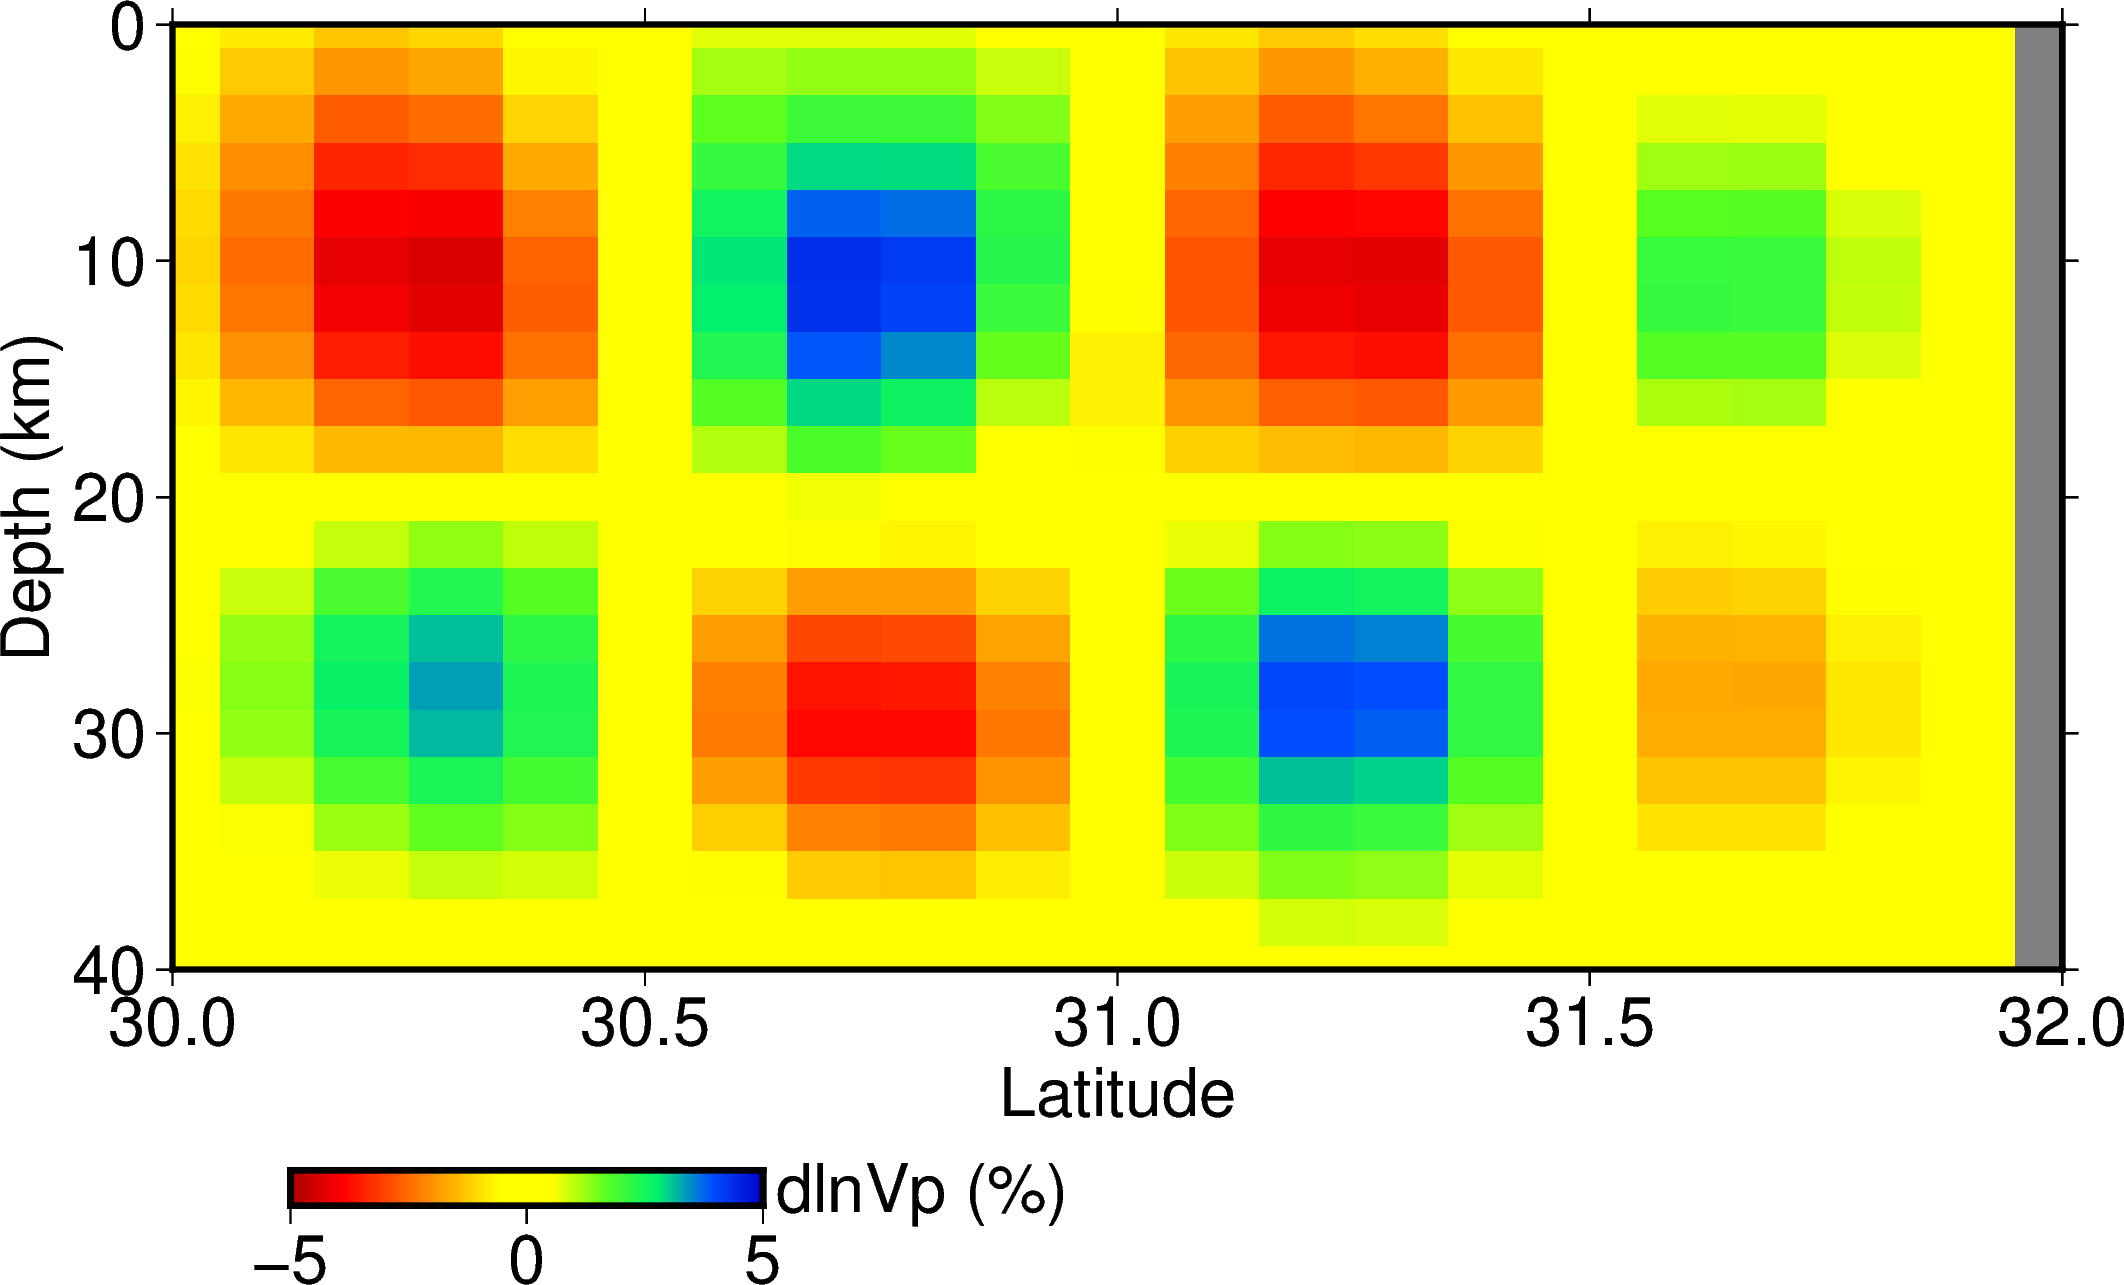

In [4]:
dx = 0.1; dy = 2
lon = sec_lon[0]
dep = sec_dep[0]
vel = sec_vel[0]
fname = 'img/3a_inv_model_profile_1.png'
fig = plot_map(lon,dep,vel,dx,dy,
            fname       = fname, 
            region      = [30.0,32.0,0,40],
            fig_size    = [16, 8],
            axis_label  = ["Longtitude","Depth (km)"],
            colorbar    = "dlnVp (%)", 
            cpt_range   = [-5,5],
            y_reverse   = True)

lat = sec_lat[1]
dep = sec_dep[1]
vel = sec_vel[1]
fname = 'img/3a_inv_model_profile_2.png'
fig = plot_map(lat,dep,vel,dx,dy,
            fname       = fname, 
            region      = [30.0,32.0,0,40],
            fig_size    = [16, 8],
            axis_label  = ["Latitude","Depth (km)"],
            colorbar    = "dlnVp (%)", 
            cpt_range   = [-5,5],
            y_reverse   = True)